In [2]:
import cv2
import os
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , accuracy_score

In [14]:
#Model Parameters
batch_size = 16
learning_rate = 0.0001
EPOCHS=70

In [15]:
# Set the directory paths for the benign and malignant images
benign_dir = 'Dataset/Benign Masses'
malignant_dir = 'Dataset/Malignant Masses'

# Target size for resizing
target_size = (224, 224)

# Lists to store the images and labels
images = []
labels = []

# Function to resize and process the images
def process_image(image_path, label):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, target_size)
    images.append(resized_image)
    labels.append(label)

# Processing the benign images
for filename in os.listdir(benign_dir):
    image_path = os.path.join(benign_dir, filename)
    process_image(image_path, label='benign')

# Processing the malignant images
for filename in os.listdir(malignant_dir):
    image_path = os.path.join(malignant_dir, filename)
    process_image(image_path, label='malignant')

In [16]:
#Converting lists to numpy arrays
images = np.array(images)/255.0
labels = np.array(labels)

In [17]:
#Encoding labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#One-hot-encoding our labels
labels = to_categorical(labels)
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [18]:
# Assuming X contains your feature data and y contains your target labels
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

In [19]:
#Data augmentation
trainAug = ImageDataGenerator(rotation_range=15, fill_mode = "nearest")

In [20]:
#VGG16 Model introduction
baseModel = VGG16(weights = "imagenet", include_top = False, input_tensor=Input(shape = (224,224,3)))
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
#Connecting the basemodel (VGG16) to our output layer
headModel = baseModel.output
headModel = AveragePooling2D(pool_size = (4,4)) (headModel)
headModel = Flatten(name = "flatten") (headModel)
headModel = Dense(64, activation="relu") (headModel)
headModel = Dropout(0.5) (headModel)
headModel = Dense(2, activation="softmax") (headModel)

In [22]:
#Combine the models
model = Model(inputs = baseModel.input, outputs = headModel)

In [23]:
#Freezing the baseModel layers
for layer in baseModel.layers:
    layer.trainable = False

In [24]:
# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# Fit the model
H = model.fit(trainAug.flow(trainX,trainY, batch_size= batch_size),
            steps_per_epoch = len(trainX) // batch_size,
            validation_data = (testX, testY),
            validation_steps = len(testX) // batch_size,
            epochs = EPOCHS,
            )

# Evaluate the model

loss, accuracy = model.evaluate(testX, testY)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/70
14/14 [==============================] - 17s 1s/step - loss: 0.8150 - accuracy: 0.5370 - val_loss: 0.7871 - val_accuracy: 0.4828
Epoch 2/70
14/14 [==============================] - 16s 1s/step - loss: 0.8056 - accuracy: 0.4769 - val_loss: 0.7463 - val_accuracy: 0.4828
Epoch 3/70
14/14 [==============================] - 16s 1s/step - loss: 0.7439 - accuracy: 0.5417 - val_loss: 0.7232 - val_accuracy: 0.4828
Epoch 4/70
14/14 [==============================] - 16s 1s/step - loss: 0.7307 - accuracy: 0.5046 - val_loss: 0.7098 - val_accuracy: 0.5000
Epoch 5/70
14/14 [==============================] - 16s 1s/step - loss: 0.7326 - accuracy: 0.4769 - val_loss: 0.7008 - val_accuracy: 0.4828
Epoch 6/70
14/14 [==============================] - 16s 1s/step - loss: 0.7111 - accuracy: 0.5000 - val_loss: 0.6956 - val_accuracy: 0.4655
Epoch 7/70
14/14 [==============================] - 16s 1s/step - loss: 0.7096 - accuracy: 0.5463 - val_loss: 0.6934 - val_accuracy: 0.4483
Epoch 8/70
14/14 [==

In [25]:
#make predictions on the testing set
print("[INFO] network evaluation...")
predIdxs= model.predict(testX,batch_size=batch_size)
print(predIdxs)

[INFO] network evaluation...
4/4 [==============================] - 3s 802ms/step
[[0.3292305  0.67076945]
 [0.49289516 0.5071049 ]
 [0.6861559  0.3138441 ]
 [0.509063   0.49093702]
 [0.43749323 0.5625068 ]
 [0.70858544 0.29141456]
 [0.3567448  0.6432551 ]
 [0.72802156 0.2719785 ]
 [0.5743264  0.42567354]
 [0.3292305  0.67076945]
 [0.5693245  0.43067545]
 [0.6962906  0.30370936]
 [0.5636445  0.4363555 ]
 [0.57633954 0.42366043]
 [0.5591776  0.44082233]
 [0.673676   0.32632393]
 [0.48300776 0.5169922 ]
 [0.64159566 0.35840434]
 [0.5888239  0.4111761 ]
 [0.4326574  0.5673426 ]
 [0.72024065 0.2797594 ]
 [0.54160935 0.45839065]
 [0.55386317 0.44613677]
 [0.59827065 0.40172935]
 [0.68281555 0.31718445]
 [0.5835018  0.4164982 ]
 [0.5835018  0.4164982 ]
 [0.62506664 0.3749334 ]
 [0.4685769  0.5314231 ]
 [0.6012963  0.39870366]
 [0.6786983  0.32130167]
 [0.3431527  0.6568473 ]
 [0.5271173  0.4728827 ]
 [0.7173807  0.28261933]
 [0.5893654  0.41063458]
 [0.45639938 0.5436006 ]
 [0.57464826 0.425

In [26]:
#classification report
y_pred = model.predict(testX)>0.5
print(classification_report(testY,y_pred,digits=4,target_names=['B','M']))

2/2 [==============================] - 3s 1s/step
              precision    recall  f1-score   support

           B     0.5135    0.6786    0.5846        28
           M     0.5714    0.4000    0.4706        30

   micro avg     0.5345    0.5345    0.5345        58
   macro avg     0.5425    0.5393    0.5276        58
weighted avg     0.5435    0.5345    0.5256        58
 samples avg     0.5345    0.5345    0.5345        58



In [33]:


# Convert multi-class labels to discrete binary format
testY_discrete = np.argmax(testY, axis=1)
predIdxs_discrete = np.argmax(predIdxs, axis=1)

# Calculation of the confusion matrix
cm = confusion_matrix(testY_discrete, predIdxs_discrete)

# Calculation of accuracy
accuracy = accuracy_score(testY_discrete, predIdxs_discrete) * 100

# Display the confusion matrix and accuracy
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy))


Confusion Matrix:
[[19  9]
 [18 12]]
Accuracy: 53.45%


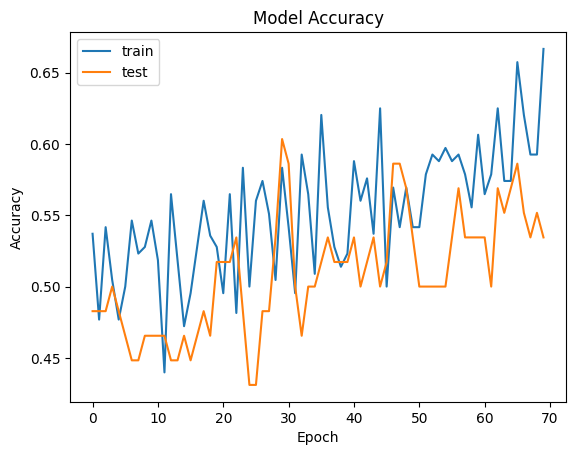

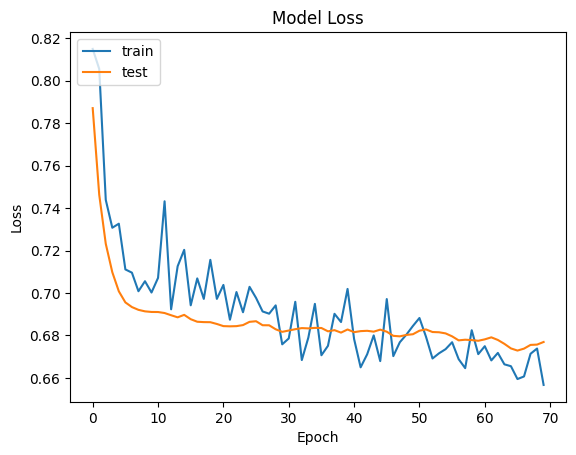

In [34]:
#Summarizing history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Summarizing history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()